# Projet de Machine Learning

# Jeu de données

Les données proviennent du concours KAGGLE et font partie du jeu de données intitulé "Gym Members Exercise Dataset", accessible ici : [Gym Members Exercise Dataset](https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset).

Ce jeu de données offre un aperçu détaillé des habitudes d'exercice, des caractéristiques physiques et des indicateurs de condition physique des membres d’une salle de sport. Il comprend 15 variables observées chez 973 individus fréquentant une salle de sport :

- **Age** : Âge du membre.
- **Gender** : Sexe du membre (variable qualitative avec deux catégories : homme ou femme).
- **Weight_kg** : Poids en kilogrammes.
- **Height_m** : Taille en mètres.
- **Max_BPM** : Fréquence cardiaque maximale (en battements par minute) atteinte pendant les séances d’entraînement.
- **Avg_BPM** : Fréquence cardiaque moyenne durant les séances d’entraînement.
- **Resting_BPM** : Fréquence cardiaque au repos avant l’entraînement.
- **Session_Duration_hours** : Durée de chaque séance d’entraînement en heures.
- **Calories_Burned** : Nombre total de calories brûlées lors de chaque séance.
- **Workout_Type** : Type d’entraînement pratiqué (variable qualitative avec 4 catégories : cardio, musculation, yoga, HIIT).
- **Fat_Percentage** : Pourcentage de masse grasse du membre.
- **Water_Intake_liters** : Quantité d’eau consommée quotidiennement pendant les séances d’entraînement.
- **Workout_Frequency_days_week** : Nombre de séances d’entraînement hebdomadaires (variable qualitative avec 4 catégories : de 2 à 5 séances).
- **Experience_Level** : Niveau d’expérience (variable qualitative avec 3 niveaux : 1 pour débutant, 3 pour expert).
- **BMI** : Indice de masse corporelle (IMC), calculé à partir du poids et de la taille.

L'objectif de ce projet est d'abord de prédire la variable **Calories_Burned** en fonction des autres variables, puis d'estimer la variable **Experience_Level** en utilisant toutes les autres variables disponibles, y compris **Calories_Burned**.


In [54]:
library(ggplot2)
library(ggplot2)
library(gridExtra)
library(dplyr)
library(corrplot)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)
library(ggcorrplot)

## 1. Analyse exploratoire des données
L’objectif dans un premier temps est d’explorer les différentes variables, étape préliminaire indispensable à
l’analyse. Ci-dessous sont précisées quelques questions basiques. Vous pouvez compléter l’analyse selon vos
propres idées.
* Commencez par vérifier la nature des différentes variables et leur encodage. N’oubliez pas de convertir
toutes les variables qualitatives.
* Commencez l’exploration par une analyse descriptive unidimensionnelle des données. Des transformations
des variables quantitatives vous semblent-t-elles pertinentes ?
* Poursuivez avec une analyse descriptive bidimensionnelle. Utilisez des techniques de visualisation: par
exemple les nuages de points (scatterplot), des graphes des correlations, des boîtes à moustaches parallèles,
mosaicplot... Quelles variables semblent liées ?
* Réalisez une analyse en composantes principales des variables explicatives quantitatives et interprétez les
résultats. Visualisez les dépendances éventuelles entre les variables à prédire et les variables explicatives.

### 1.1 Vérifier la nature des différentes variables 

In [3]:
data = read.csv("gym_members_exercise_tracking.csv")
summary(data)

      Age           Gender           Weight..kg.       Height..m.   
 Min.   :18.00   Length:973         Min.   : 40.00   Min.   :1.500  
 1st Qu.:28.00   Class :character   1st Qu.: 58.10   1st Qu.:1.620  
 Median :40.00   Mode  :character   Median : 70.00   Median :1.710  
 Mean   :38.68                      Mean   : 73.85   Mean   :1.723  
 3rd Qu.:49.00                      3rd Qu.: 86.00   3rd Qu.:1.800  
 Max.   :59.00                      Max.   :129.90   Max.   :2.000  
    Max_BPM         Avg_BPM       Resting_BPM    Session_Duration..hours.
 Min.   :160.0   Min.   :120.0   Min.   :50.00   Min.   :0.500           
 1st Qu.:170.0   1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040           
 Median :180.0   Median :143.0   Median :62.00   Median :1.260           
 Mean   :179.9   Mean   :143.8   Mean   :62.22   Mean   :1.256           
 3rd Qu.:190.0   3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460           
 Max.   :199.0   Max.   :169.0   Max.   :74.00   Max.   :2.000           

Nous observons que:
- **Gender** (Sexe) → *Caractère (qualitative nominale)*
- **Workout_Type** (Type d'entraînement) → *Caractère (qualitative nominale)*
- **Workout_Frequency.days.week.** (Fréquence d'entraînement) → *Qualitative ordinale* (modalités discrètes : 2 à 5 jours)
- **Experience_Level** (Niveau d’expérience) → *Qualitative ordinale* (valeurs : 1 = débutant, 3 = expert)
- **Age** (Âge) → *Quantitative continue*
- **Weight_kg** (Poids) → *Quantitative continue*
- **Height_m** (Taille) → *Quantitative continue*
- **Max_BPM** (Fréquence cardiaque max) → *Quantitative continue*
- **Avg_BPM** (Fréquence cardiaque moyenne) → *Quantitative continue*
- **Resting_BPM** (Fréquence cardiaque au repos) → *Quantitative continue*
- **Session_Duration_hours** (Durée de séance) → *Quantitative continue*
- **Calories_Burned** (Calories brûlées) → *Quantitative continue*
- **Fat_Percentage** (Pourcentage de graisse) → *Quantitative continue*
- **Water_Intake_liters** (Consommation d’eau) → *Quantitative continue*
- **BMI** (Indice de masse corporelle) → *Quantitative continue*

**Cependant, la presentation des variables qualitatives ne sont pas efficases pour les analyser, donc, il faut changer du type des variables qualitatives en facteur**

In [5]:
data[, 'Gender'] <- as.factor(data[, 'Gender'])
data[, 'Workout_Type'] <- as.factor(data[, 'Workout_Type'])
data[, 'Workout_Frequency..days.week.'] <- as.factor(data[, 'Workout_Frequency..days.week.'])
data[, 'Experience_Level'] <- as.factor(data[, 'Experience_Level'])
summary(data)


      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Session_Duration..hours. Calories_Burned 
 Min.   :120.0   Min.   :50.00   Min.   :0.500            Min.   : 303.0  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040            1st Qu.: 720.0  
 Median :143.0   Median :62.00   Median :1.260            Median : 893.0  
 Mean   :143.8   Mean   :62.22   Mean   :1.256            Mean   : 905.4  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460            3rd Qu.:1076.0

### 1.2 Analyse descriptive unidimensionnelle

In [7]:
cat_cols = c('Gender','Workout_Type', 'Workout_Frequency..days.week.', 'Experience_Level')
cat = data[cat_cols]
num <- data %>% select(-all_of(cat_cols))

### 1.2.1 Variables quantitatives

- **Distribution de la variable en classes**

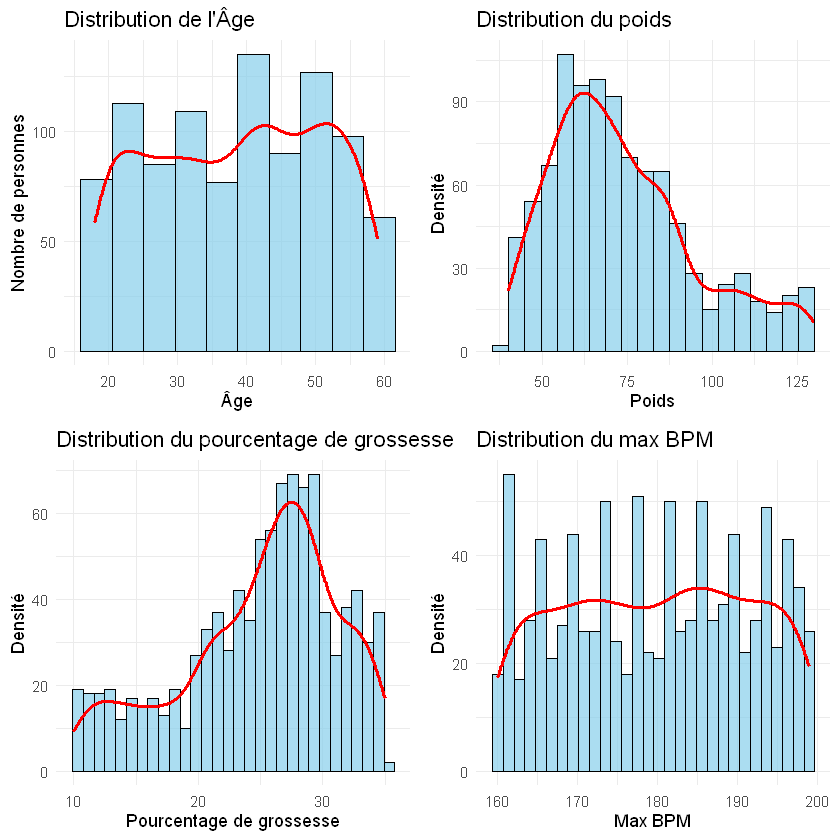

In [92]:
hist_age = ggplot(data, aes(x = Age)) +
  geom_histogram(aes(y = after_stat(count)), bins = 10, fill = "skyblue", color = "black", alpha = 0.7) +   
  geom_density( aes(y = after_stat(density * nrow(data) * (max(data$Age) - min(data$Age)) / 10)), color = "red", size = 1 ) +  
  labs(title = "Distribution de l'Âge", x = "Âge", y = "Nombre de personnes" ) + 
  theme_minimal()  
hist_weight = ggplot(data, aes(x = Weight..kg.)) +
  geom_histogram(aes(y = after_stat(count)), bins = 20, fill = "skyblue", color = "black", alpha = 0.7) +   
  geom_density(aes(y = after_stat(density * nrow(data) * (max(data$Weight..kg.) - min(data$Weight..kg.)) / 20)), color = "red", size = 1) +  
  labs(title = "Distribution du poids", x = "Poids", y = "Densité") +  
  theme_minimal()  
hist_Max_BPM = ggplot(data, aes(x = Max_BPM)) +
  geom_histogram(aes(y = after_stat(count)), bins = 30,  fill = "skyblue", color = "black", alpha = 0.7) +   
  geom_density(aes(y = after_stat(density * nrow(data) * (max(data$Max_BPM) - min(data$Max_BPM)) / 30)), color = "red", size = 1) +  
  labs(title = "Distribution du max BPM", x = "Max BPM", y = "Densité") +  
  theme_minimal()  
hist_fat_p = ggplot(data, aes(x = Fat_Percentage)) +
  geom_histogram(aes(y = after_stat(count)),bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +   
  geom_density(aes(y = after_stat(density * nrow(data) * (max(data$Fat_Percentage) - min(data$Fat_Percentage)) / 30)), color = "red", size = 1) +  
  labs(title = "Distribution du pourcentage de grossesse", x = "Pourcentage de grossesse", y = "Densité") +  
  theme_minimal() 
grid.arrange(hist_age, hist_weight, hist_fat_p, hist_Max_BPM, 
             ncol = 2, nrow = 2)   


**La médiane, l’étendue interquartile et d’éventuels outliers**

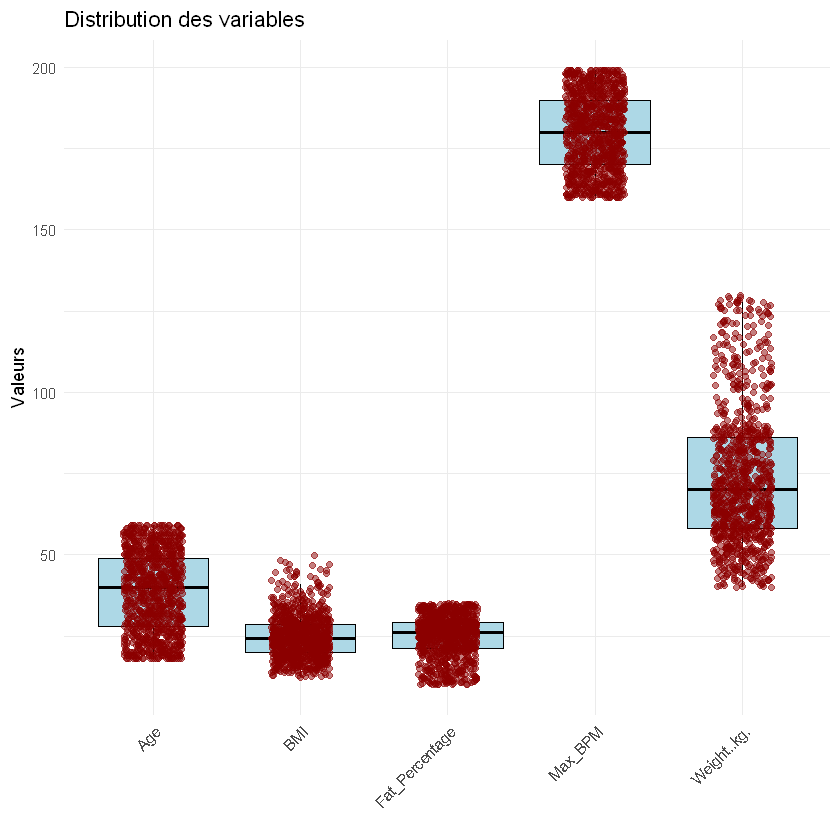

In [123]:
box_cols = c("Age", "Weight..kg.", "Max_BPM", "Fat_Percentage", "BMI" )

num_long <- num[box_cols] %>% 
  pivot_longer( cols = everything(), names_to = "Variable", values_to = "Valeur")

ggplot(num_long, aes(x = Variable, y = Valeur)) +
  geom_boxplot(
    fill = "lightblue", 
    color = "black", 
    outlier.shape = NA
  ) +  
  geom_jitter(width = 0.2, alpha = 0.5, color = "darkred", size = 1.5 ) +
  labs( title = "Distribution des variables", x = "", y = "Valeurs" ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  

- **Test de la normalité**

In [133]:
shapiro.test(num$Height..m.)
shapiro.test(num$Weight..kg.)


	Shapiro-Wilk normality test

data:  num$Height..m.
W = 0.96959, p-value = 2.159e-13



	Shapiro-Wilk normality test

data:  num$Weight..kg.
W = 0.94293, p-value < 2.2e-16


$\rightarrow$ Au niveau 1%, la taille et la poids suivent la loi normale

### 1.2.2 Variables qualitatives

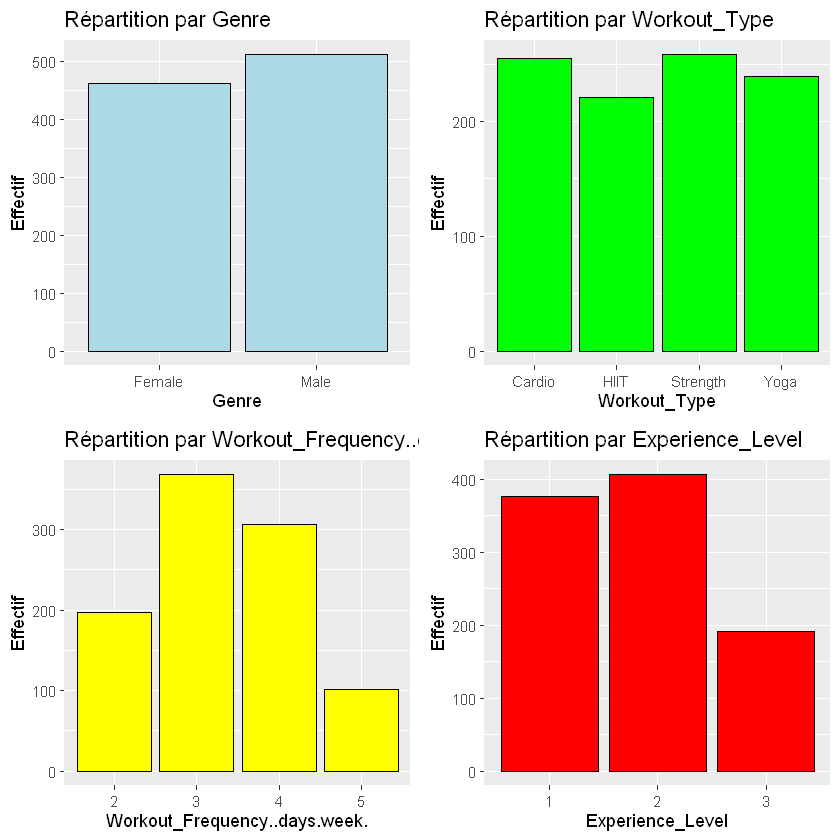

In [170]:
box_cat1 = ggplot(data, aes(x = Gender)) +
  geom_bar(fill = "lightblue", color = "black") +  
  labs(title = "Répartition par Genre", x = "Genre", y = "Effectif")
box_cat2 = ggplot(data, aes(x = Workout_Type)) +
  geom_bar(fill = "green", color = "black") +  
  labs(title = "Répartition par Workout_Type", x = "Workout_Type", y = "Effectif")
box_cat3 = ggplot(data, aes(x = Workout_Frequency..days.week.)) +
  geom_bar(fill = "yellow", color = "black") +  
  labs(title = "Répartition par Workout_Frequency..days.week.", x = "Workout_Frequency..days.week.", y = "Effectif")
box_cat4 = ggplot(data, aes(x = Experience_Level)) +
  geom_bar(fill = "red", color = "black") +  
  labs(title = "Répartition par Experience_Level", x = "Experience_Level", y = "Effectif")
grid.arrange(box_cat1,box_cat2, box_cat3, box_cat4, ncol = 2)

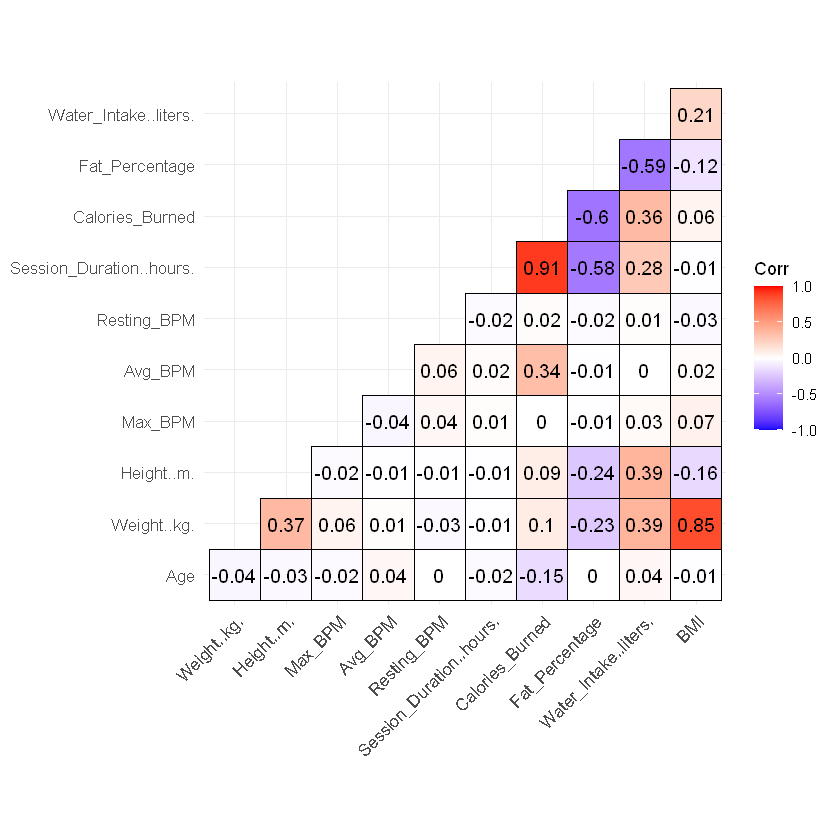

In [127]:
ggcorrplot(cor(num), 
           method = "square",
           type = "lower",
           lab = TRUE,
           colors = c("blue", "white", "red"),
           outline.color = "black",
           tl.cex = 10)

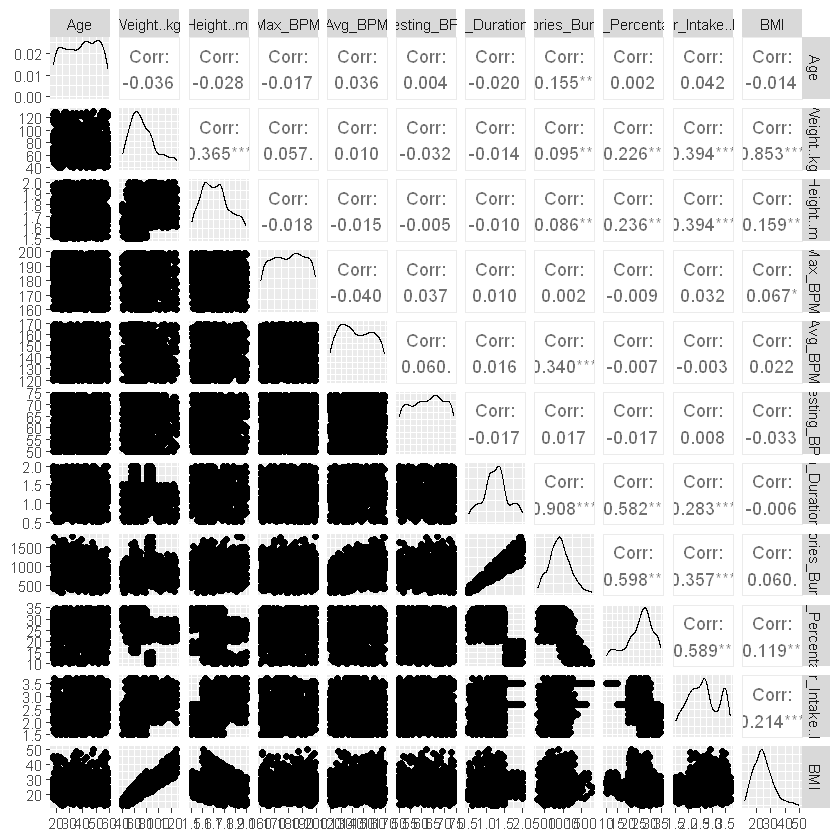

In [33]:
ggpairs(num)

Nous obvervons que *Height..m.*, *Height..m.*, avec les variables de BPM sont bien indépendants. Alors que, *Height..m.* et *BMI* ou *Session_Duration..hours.* et *Calories_Burned* sont fortement corrélées.